In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from keras import optimizers
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [4]:
#normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras import layers, models
#Seemed to be overfitting on the training data and it was not transferring over well to the validation data,
#So decreased filter sizes to increment more gradually. Also added in dropout layers and batch normalization to help with overfitting.
lenet = keras.models.Sequential([
    #filter size changed to 16, kernel_size changed to 3
    keras.layers.Conv2D(16, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    #added batch normalization
    keras.layers.BatchNormalization(),
    #Changed from average pooling to max pooling
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    #added dropout layer 
    keras.layers.Dropout(.2),
    #Filter size changed to 32, kernel to 3, padding changed to be same
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.2),
    #Filter size changed to 64, kernel to 3, padding changed to be same
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S2
    keras.layers.Dropout(.2),
    #Filter size changed to 128, kernel to 3, padding changed to be same
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Flatten(),
    keras.layers.Dropout(.2),  
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Baseline lenet validation results:

Accuracy : 59%,
Loss : 4.9

80% accuracy & 0.65 loss by adding dropout, batch normalization, padding = same, kernel size changed to 3, and filter size changes.

In [ ]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 17s 8ms/step - loss: 1.5290 - accuracy: 0.4558 - val_loss: 1.3613 - val_accuracy: 0.5310
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1282 - accuracy: 0.6001 - val_loss: 1.2123 - val_accuracy: 0.5923
Epoch 3/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9745 - accuracy: 0.6580 - val_loss: 0.9677 - val_accuracy: 0.6610
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8935 - accuracy: 0.6853 - val_loss: 0.8284 - val_accuracy: 0.7091
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8361 - accuracy: 0.7067 - val_loss: 0.8356 - val_accuracy: 0.7032
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7969 - accuracy: 0.7201 - val_loss: 1.0600 - val_accuracy: 0.6553
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7525 - accuracy: 0.7368 - val_loss: 0.7361 -

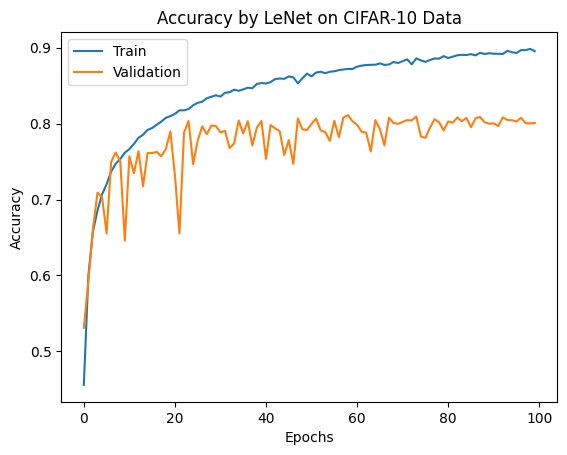

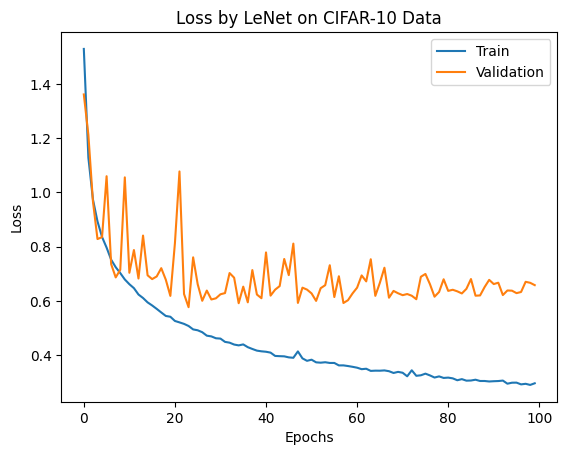

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


313/313 [==============================] - 1s 3ms/step


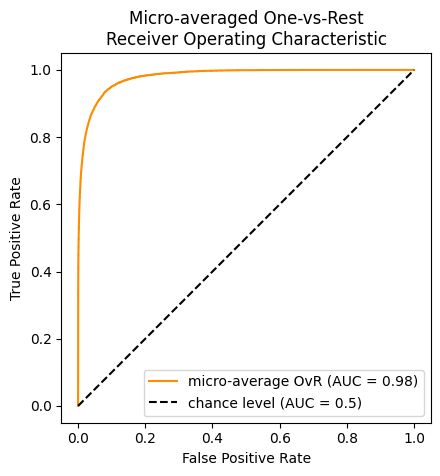

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
y_score = lenet.predict(x_test)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

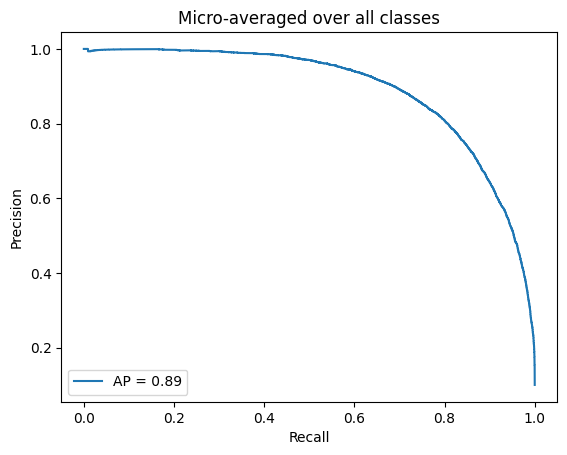

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.8007


In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),input_shape=(32,32,3), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.2))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(Dropout(0.2))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 18s 9ms/step - loss: 1.8719 - accuracy: 0.3138 - val_loss: 1.5194 - val_accuracy: 0.4359
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5329 - accuracy: 0.4422 - val_loss: 1.4081 - val_accuracy: 0.4852
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4137 - accuracy: 0.4954 - val_loss: 1.5075 - val_accuracy: 0.4655
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3289 - accuracy: 0.5325 - val_loss: 1.2838 - val_accuracy: 0.5513
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2632 - accuracy: 0.5583 - val_loss: 1.2165 - val_accuracy: 0.5705
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2106 - accuracy: 0.5767 - val_loss: 1.0841 - val_accuracy: 0.6166
Epoch 7/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1678 - accuracy: 0.5952 - val_loss: 1.1439 -

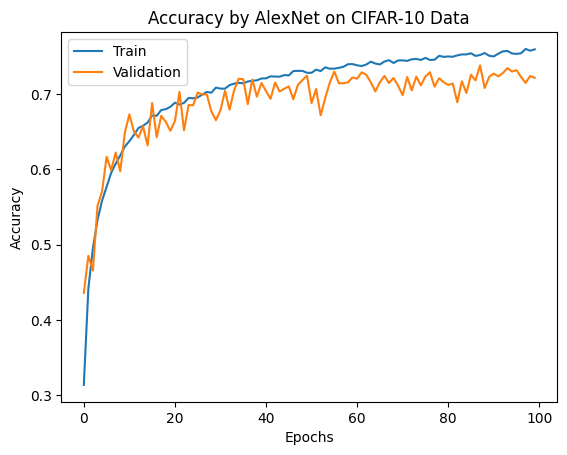

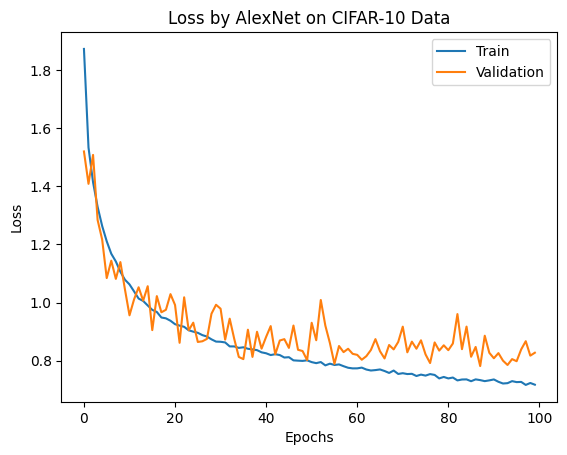

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

313/313 [==============================] - 1s 3ms/step
Test accuracy by AlexNet: 0.7214


313/313 [==============================] - 1s 3ms/step


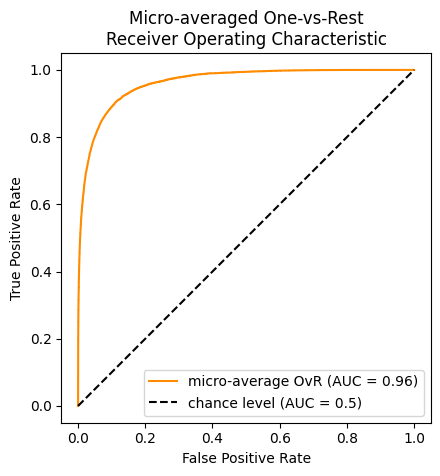

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
y_score = AlexNet.predict(x_test)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

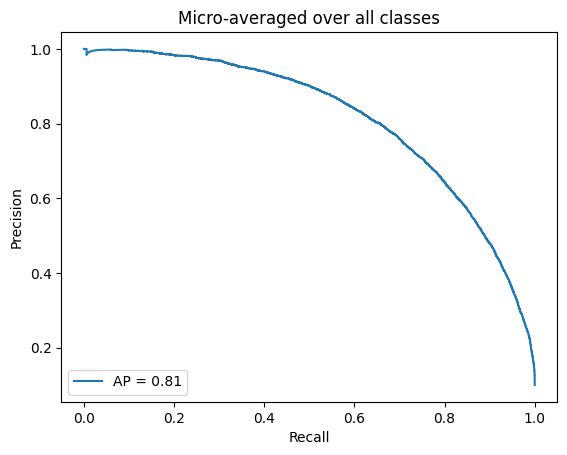

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

In [ ]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

In [ ]:
#Added batch normalization and dropout layers to reduce overfitting, model could be made more accurate with more training epochs
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vg_hist = model.fit(x=x_train,y=one_hot_y_train, validation_data=(x_test, one_hot_y_test), batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.7737 - accuracy: 0.3755 - val_loss: 1.3901 - val_accuracy: 0.5010
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3365 - accuracy: 0.5447 - val_loss: 1.2476 - val_accuracy: 0.5570
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1082 - accuracy: 0.6274 - val_loss: 1.2006 - val_accuracy: 0.5925
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9978 - accuracy: 0.6745 - val_loss: 1.3012 - val_accuracy: 0.5806
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8608 - accuracy: 0.7190 - val_loss: 1.1190 - val_accuracy: 0.6642
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8461 - accuracy: 0.7303 - val_loss: 1.1801 - val_accuracy: 0.6091
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7794 - accuracy: 0.7547 - val_loss: 1.2034 -

In [ ]:
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 1s 58ms/step - loss: 0.6238 - accuracy: 0.7980


[0.6238389015197754, 0.7979999780654907]

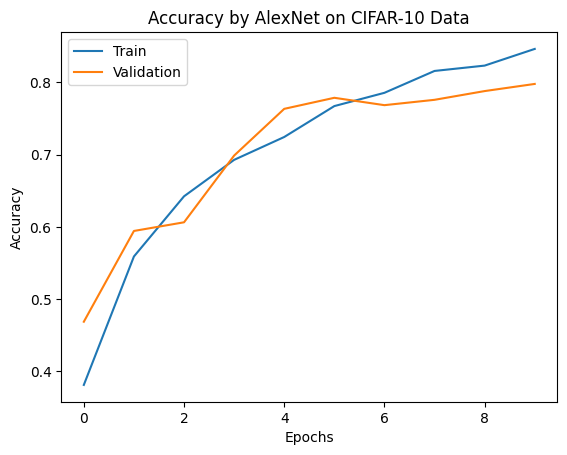

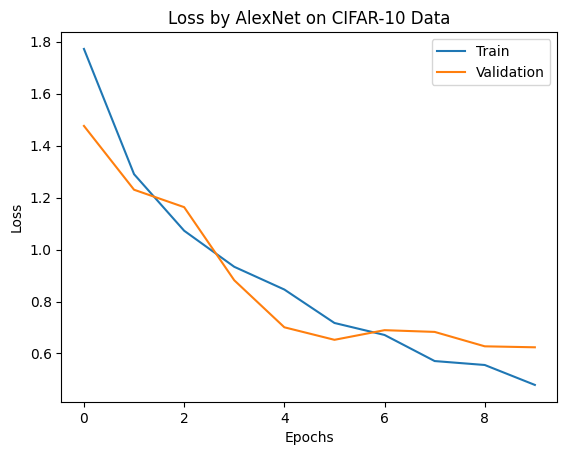

In [ ]:
# summarize history for accuracy
plt.plot(vg_hist.history['accuracy'])
plt.plot(vg_hist.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(vg_hist.history['loss'])
plt.plot(vg_hist.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 4ms/step


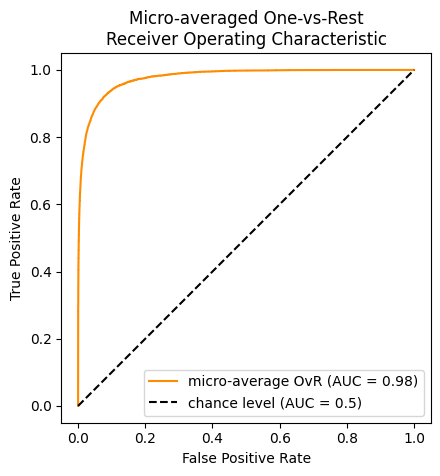

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
y_score = model.predict(x_test)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

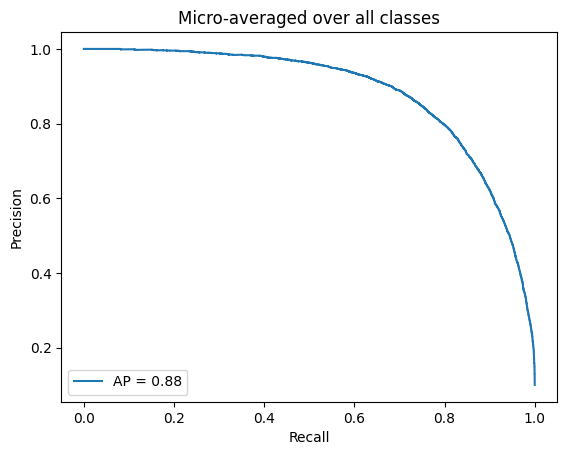

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

In [33]:
vgg_model = tf.keras.applications.VGG19( 
    include_top=False,
    weights="imagenet",
    pooling = 'max',
    input_shape=(32,32,3),)

In [34]:
model = tf.keras.Sequential()
model.add(vgg_model)
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.0001),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [ ]:
history1_vg19 = model.fit(x=x_train,y=y_train,validation_data = (x_test,y_test),epochs = 20,verbose = 1)

Epoch 1/20
1563/1563 [==============================] - 25s 14ms/step - loss: 2.1277 - accuracy: 0.2477 - val_loss: 1.6651 - val_accuracy: 0.4291
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5785 - accuracy: 0.4569 - val_loss: 1.3307 - val_accuracy: 0.5450
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3599 - accuracy: 0.5400 - val_loss: 1.1852 - val_accuracy: 0.5874
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2263 - accuracy: 0.5847 - val_loss: 1.1082 - val_accuracy: 0.6156
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1415 - accuracy: 0.6126 - val_loss: 1.0019 - val_accuracy: 0.6515
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0669 - accuracy: 0.6398 - val_loss: 0.9616 - val_accuracy: 0.6661
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0124 - accuracy: 0.6590 - val_loss: 0.8964 -

In [ ]:
print(model.metrics_names)
model.evaluate(x=x_test,y=y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 0s 13ms/step - loss: 0.7585 - accuracy: 0.8799


[0.7585033178329468, 0.8798999786376953]

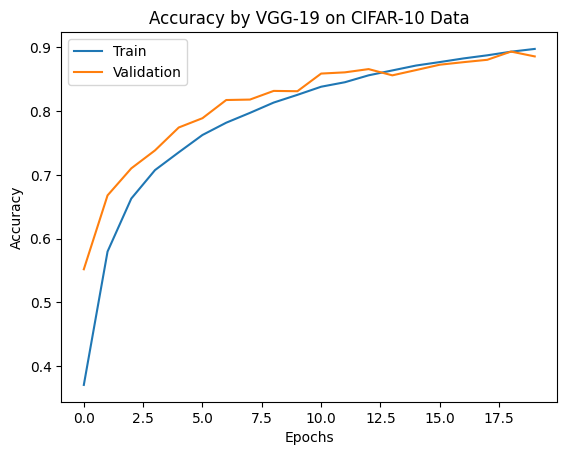

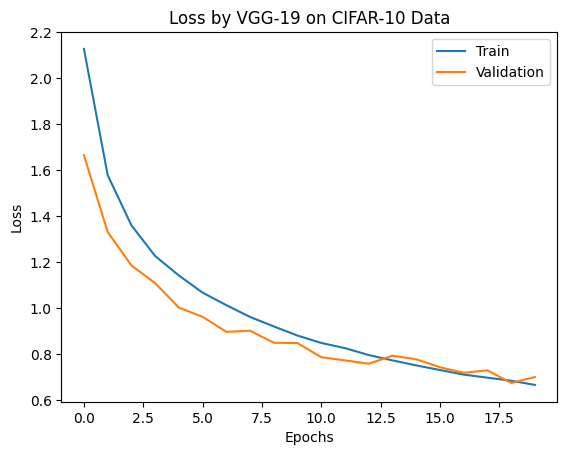

In [ ]:
# summarize history for accuracy
plt.plot(np.array(history1_vg19.history['accuracy']))
plt.plot(np.array(history1_vg19.history['val_accuracy']))
plt.title("Accuracy by VGG-19 on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1_vg19.history['loss'])
plt.plot(history1_vg19.history['val_loss'])
plt.title('Loss by VGG-19 on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 4ms/step


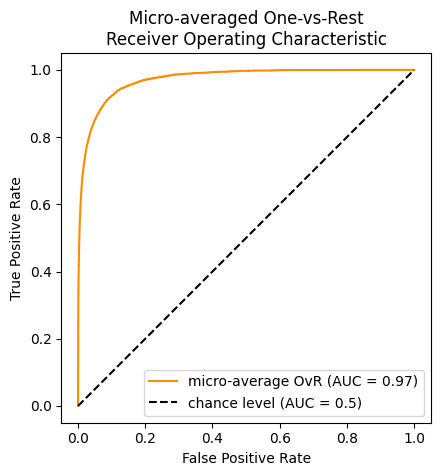

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
y_score = model.predict(x_test)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

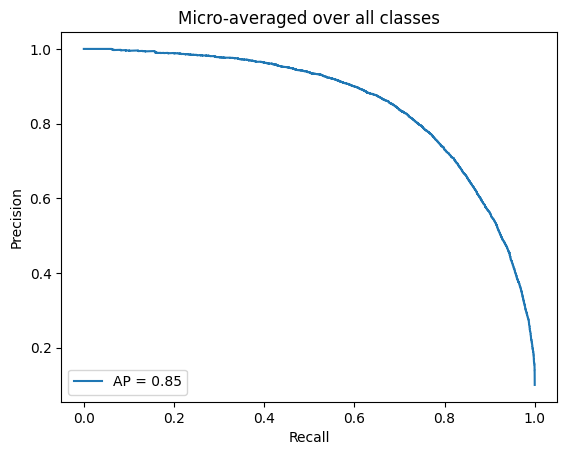

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [19]:
#Using the MNIST Dataset with these models
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
#normalization
test_y = test_y.reshape(-1,)
train_y = train_y.reshape(-1,)
from tensorflow.keras.utils import to_categorical
#train_y = to_categorical(train_y, 10)
#test_y = to_categorical(test_y, 10)
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [20]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [ ]:
#Seemed to be overfitting on the training data and it was not transferring over well to the validation data,
#So decreased filter sizes to increment more gradually. Also added in dropout layers and batch normalization to help with overfitting.
lenet = keras.models.Sequential([
    #filter size changed to 16, kernel_size changed to 3
    keras.layers.Conv2D(16, kernel_size=3, strides=1,  activation='relu', input_shape=(28,28,1), padding='same'), #C1
    #added batch normalization
    keras.layers.BatchNormalization(),
    #Changed from average pooling to max pooling
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    #added dropout layer 
    keras.layers.Dropout(.2),
    #Filter size changed to 32, kernel to 3, padding changed to be same
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.2),
    #Filter size changed to 64, kernel to 3, padding changed to be same
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S2
    keras.layers.Dropout(.2),
    #Filter size changed to 128, kernel to 3, padding changed to be same
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Flatten(),
    keras.layers.Dropout(.2),  
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist = lenet.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 18s 7ms/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0263 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0225 - val_accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0228 - val_ac

In [ ]:
lenet.evaluate(x=test_x,y=test_y,batch_size=512)

20/20 [==============================] - 0s 12ms/step - loss: 0.0213 - accuracy: 0.9939


[0.021254876628518105, 0.9939000010490417]

313/313 [==============================] - 2s 6ms/step


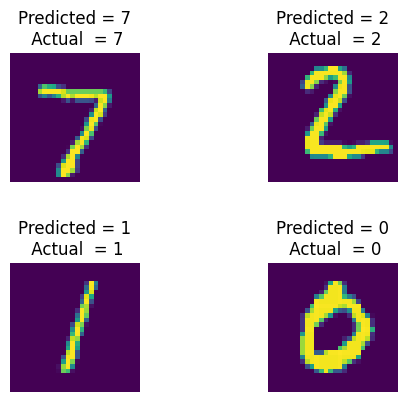

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
y_predictions= lenet.predict(test_x)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (5,5))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(test_x[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[test_y[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

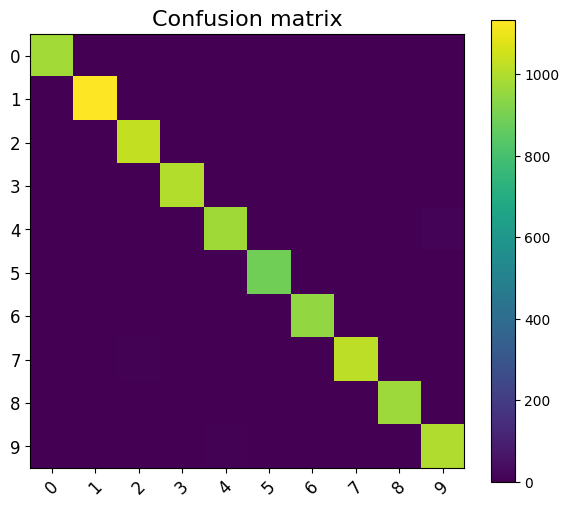

In [ ]:
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(test_y, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

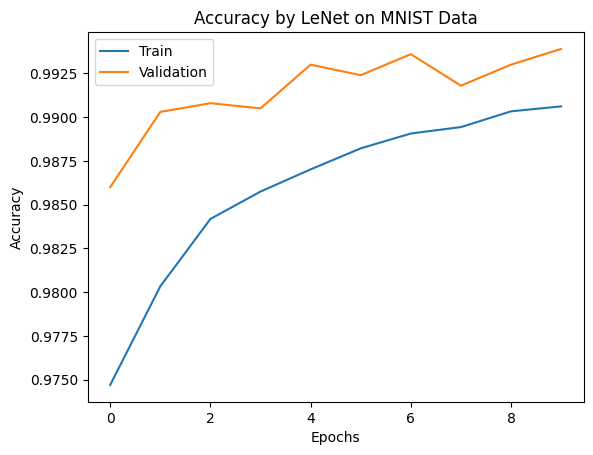

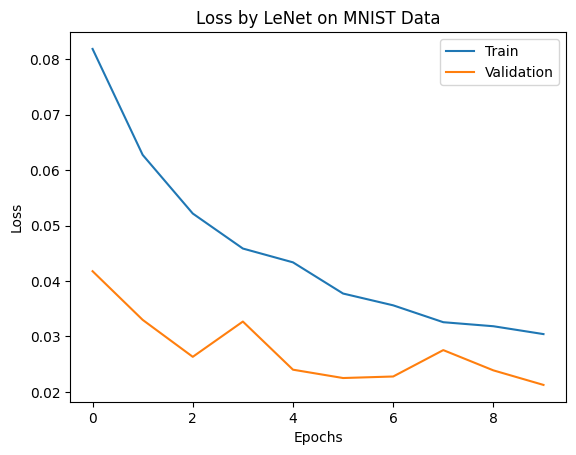

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 3ms/step


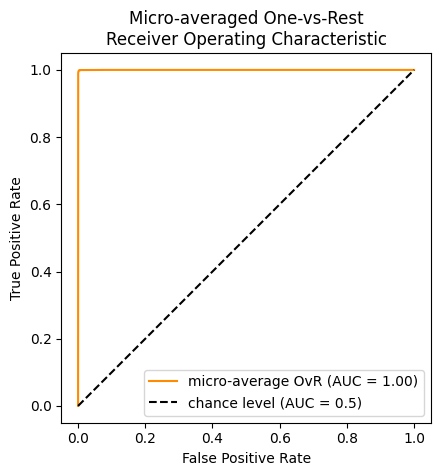

In [ ]:
y_score = lenet.predict(test_x)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

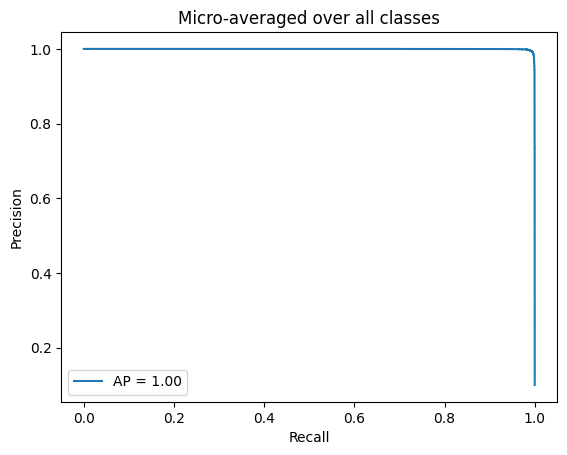

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),input_shape=(28,28,1), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Dropout(0.2))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.2))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(Dropout(0.2))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history1 = AlexNet.fit(x=train_x, y=train_y, epochs=10, validation_data=(test_x, test_y),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.4519 - accuracy: 0.8594 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1317 - accuracy: 0.9636 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1111 - accuracy: 0.9696 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0963 - accuracy: 0.9737 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0879 - accuracy: 0.9768 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0806 - accuracy: 0.9779 - val_loss: 0.0371 - val_ac

In [ ]:
AlexNet.evaluate(x=test_x,y=test_y,batch_size=512)

20/20 [==============================] - 1s 34ms/step - loss: 0.0353 - accuracy: 0.9911


[0.03525852411985397, 0.991100013256073]

313/313 [==============================] - 1s 3ms/step


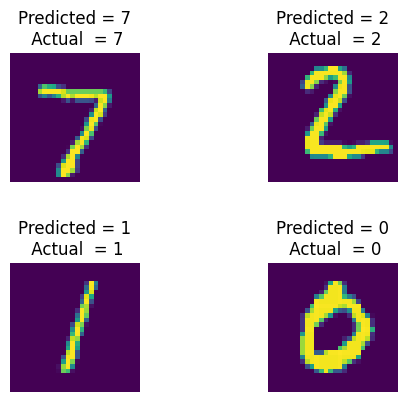

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
y_predictions= AlexNet.predict(test_x)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (5,5))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(test_x[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[test_y[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

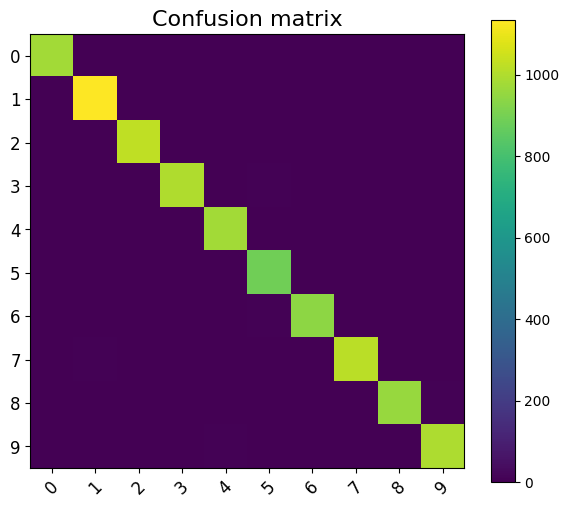

In [ ]:
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(test_y, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

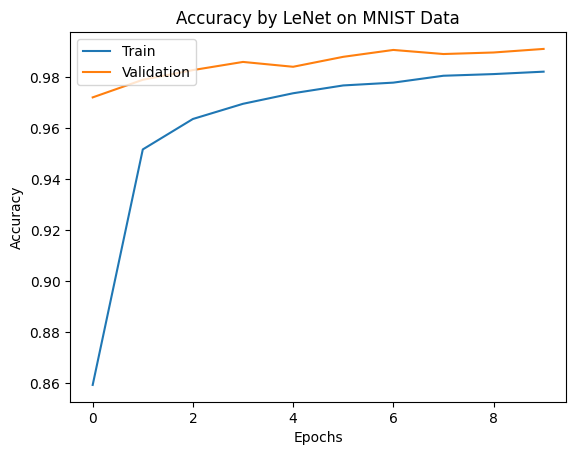

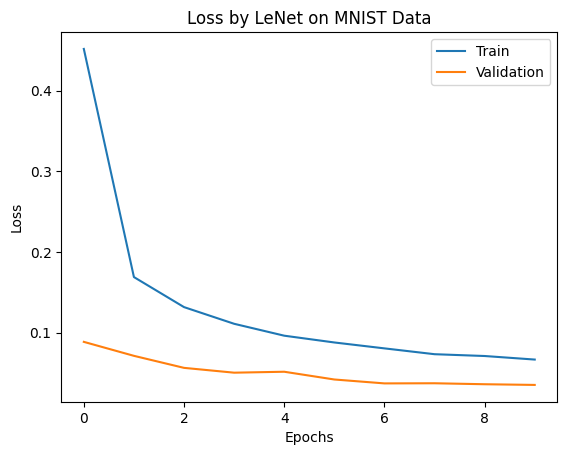

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by LeNet on MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by LeNet on MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 2s 5ms/step


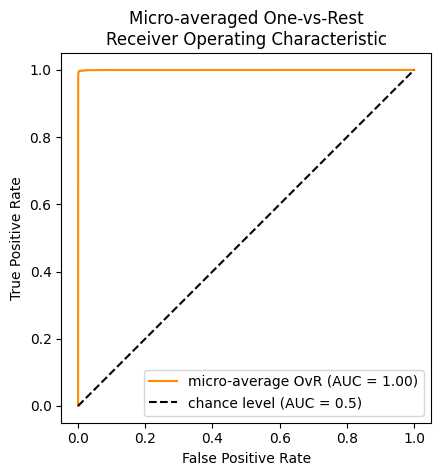

In [ ]:
y_score = AlexNet.predict(test_x)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

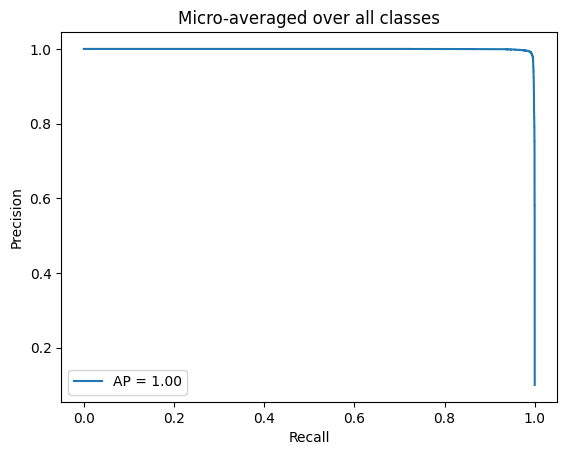

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
#Added batch normalization and dropout layers to reduce overfitting, model could be made more accurate with more training epochs
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vg_hist = model.fit(x=train_x,y=train_y, validation_data=(test_x, test_y), batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 70s 33ms/step - loss: 0.6583 - accuracy: 0.7991 - val_loss: 0.1170 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1563 - accuracy: 0.9645 - val_loss: 0.0720 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1246 - accuracy: 0.9745 - val_loss: 0.0530 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1009 - accuracy: 0.9791 - val_loss: 0.0514 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0829 - accuracy: 0.9830 - val_loss: 0.0887 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0747 - accuracy: 0.9844 - val_loss: 0.0466 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0673 - accuracy: 0.9866 - val_loss: 0.0390 -

In [ ]:
model.evaluate(x=test_x,y=test_y,batch_size=512)

20/20 [==============================] - 5s 105ms/step - loss: 0.0262 - accuracy: 0.9937


[0.026155509054660797, 0.9937000274658203]

313/313 [==============================] - 2s 7ms/step


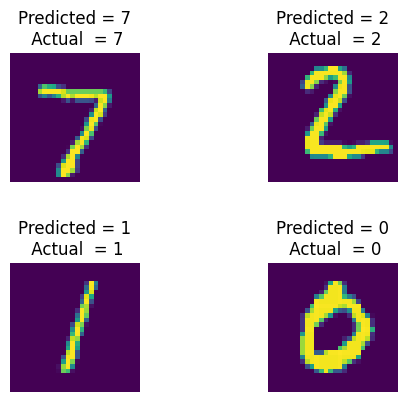

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
y_predictions= model.predict(test_x)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (5,5))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(test_x[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[test_y[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

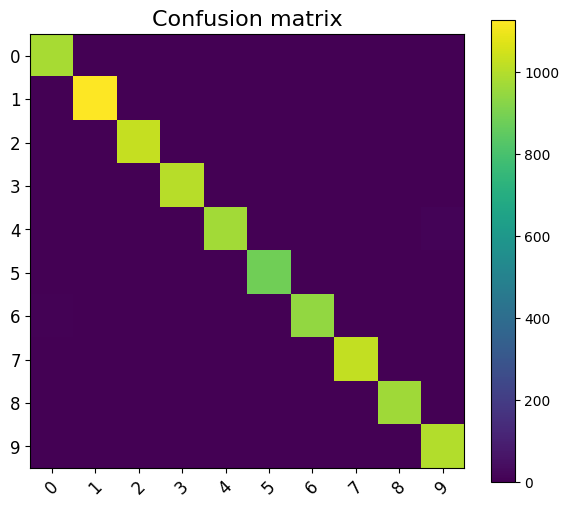

In [ ]:
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(test_y, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

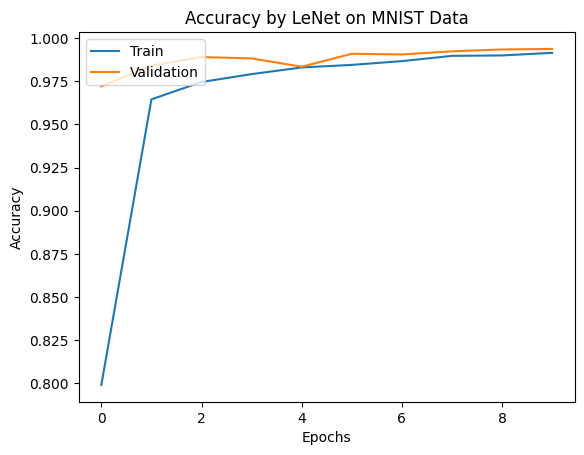

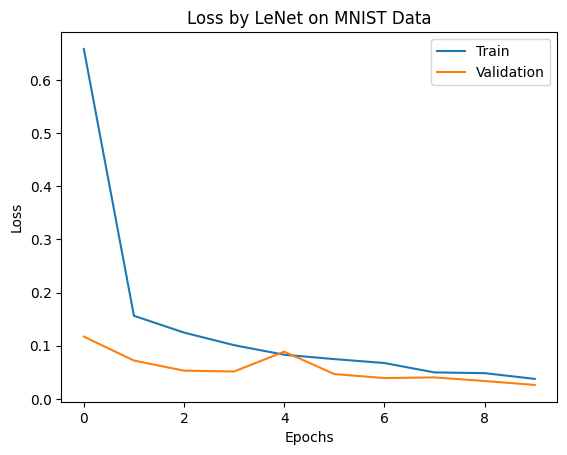

In [ ]:
# summarize history for accuracy
plt.plot(vg_hist.history['accuracy'])
plt.plot(vg_hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(vg_hist.history['loss'])
plt.plot(vg_hist.history['val_loss'])
plt.title('Loss by LeNet on MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 2s 7ms/step


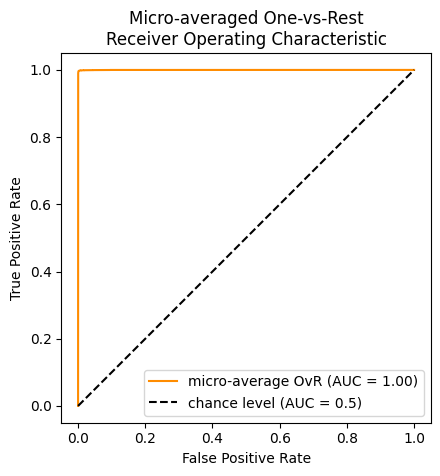

In [ ]:
y_score = model.predict(test_x)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

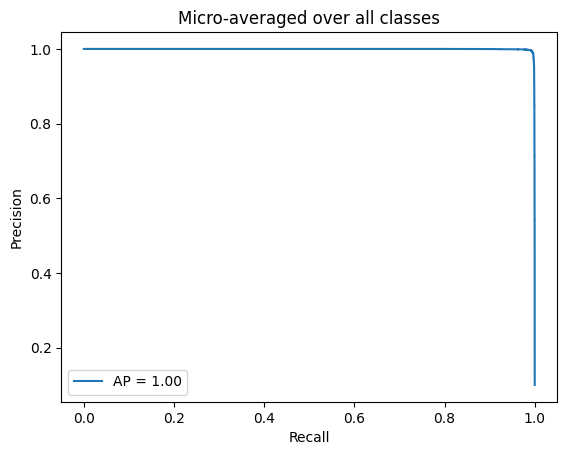

In [ ]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

In [21]:
# expand new axis, channel axis 
#train_x = np.expand_dims(train_x, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
train_x = np.repeat(train_x, 3, axis=-1)
train_x = tf.image.resize(train_x, [32,32]) # if we want to resize 
train_x.shape

TensorShape([60000, 32, 32, 3])

In [23]:
test_x = np.repeat(test_x,3,axis=-1)
test_x = tf.image.resize(test_x,[32,32])

In [27]:
test_x.shape

TensorShape([10000, 32, 32, 3])

In [35]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.0001),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])
history1_vg19 = model.fit(x=train_x,y=train_y,validation_data = (test_x,test_y),epochs = 10,verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 27s 13ms/step - loss: 0.7384 - accuracy: 0.8148 - val_loss: 0.1489 - val_accuracy: 0.9696
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2042 - accuracy: 0.9619 - val_loss: 0.0852 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1316 - accuracy: 0.9731 - val_loss: 0.0604 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1047 - accuracy: 0.9782 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0868 - accuracy: 0.9813 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0742 - accuracy: 0.9834 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0663 - accuracy: 0.9846 - val_loss: 0.0367 -

In [36]:
model.evaluate(x=test_x,y=test_y,batch_size=512)

20/20 [==============================] - 1s 24ms/step - loss: 0.0303 - accuracy: 0.9906


[0.030346030369400978, 0.9905999898910522]

313/313 [==============================] - 1s 4ms/step


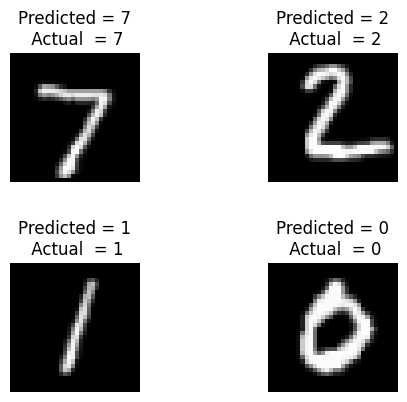

In [37]:
classes = [0,1,2,3,4,5,6,7,8,9]
y_predictions= model.predict(test_x)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (5,5))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(test_x[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[test_y[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

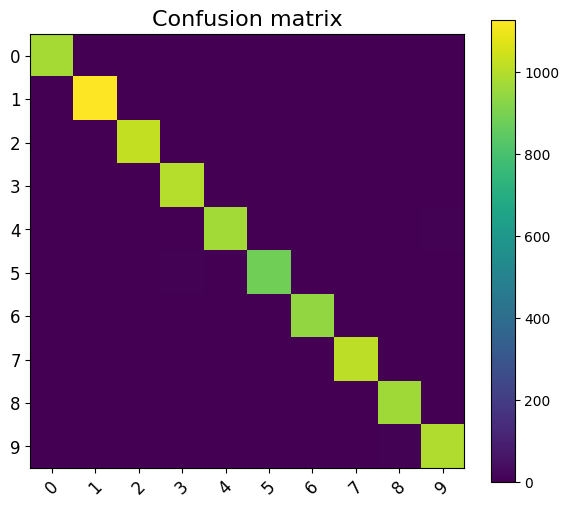

In [38]:
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(test_y, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

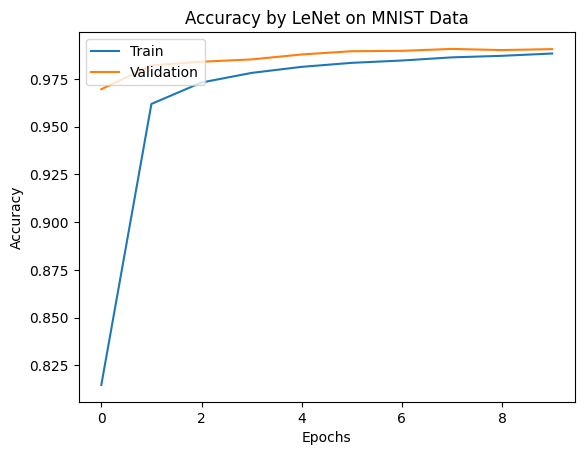

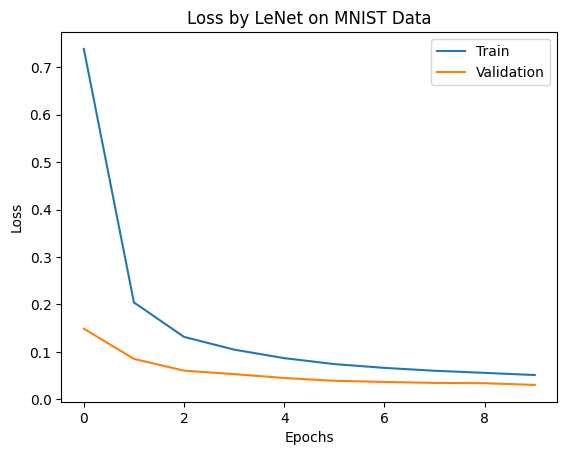

In [40]:
# summarize history for accuracy
plt.plot(history1_vg19.history['accuracy'])
plt.plot(history1_vg19.history['val_accuracy'])
plt.title("Accuracy by LeNet on MNIST Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1_vg19.history['loss'])
plt.plot(history1_vg19.history['val_loss'])
plt.title('Loss by LeNet on MNIST Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 4ms/step


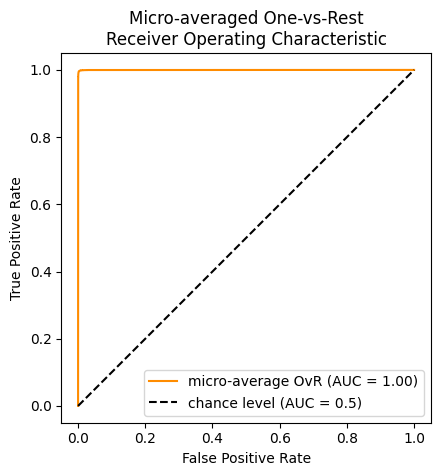

In [41]:
y_score = model.predict(test_x)
#Binarizing the labels to be able to work with the roc and auc functions in scikit learn
label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
y_onehot_test.shape
#Displaying the micro averaged one versus rest AUC of the ROC curve. This averages all of the classes to get the results.
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

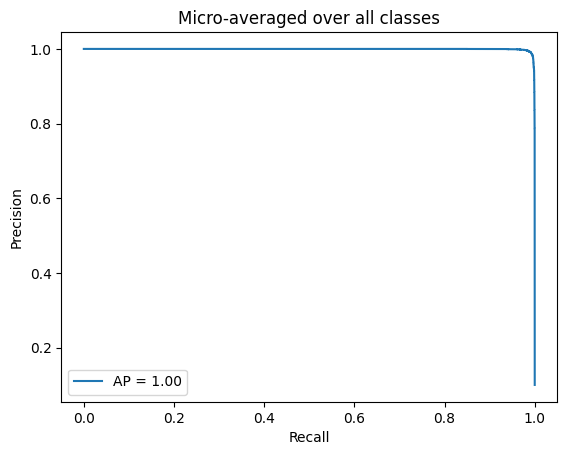

In [42]:
#Not able to use binary metric on multiclass so have to make a for loop and add the results to a dictionary to get the output later
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_onehot_test[:,i], y_score[:,i])
#Using the same idea of a micro average so show all classes at the same time.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_onehot_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_onehot_test, y_score, average="micro")

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(recall=recall["micro"],precision=precision["micro"],average_precision=average_precision["micro"],)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

The micro-averaged ROC curve helps to show what is happening with the true positive/negative rates in the model. While the precision and recall curve helps to show the same idea but visualizing the precision and any point in time(this is more beneficial in unbalanced cases, but can be used for balanced cases as well)

The majority of the issues caused by the base models seem to have been from overfitting, since the training accuracy was steadily increasing while the validation accuracy was not increasing along with it. The overall solution seems to be adding in dropout and batch normalization layers, in addition to changing the filter sizes on the convolutional layers and/or adding more convolutional layers